In [ ]:
# Librerías para la preparación de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
#%matplotlib inline
sns.set()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving pooled_ECV.csv to pooled_ECV.csv


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
datos=pd.read_csv('pooled_ECV.csv')
columnas = ['comunidad', 'jornada_semanal', 'renta_cta_ajena', 'renta_cta_propia', 'anyo', 'ponderacion']
datos = datos[columnas]
datos.replace({' ': None}, inplace=True)
datos.anyo.replace({2017: 0, 2019: 1}, inplace=True)
datos.dropna(inplace=True)
datos.jornada_semanal = datos.jornada_semanal.astype(int)
datos

,comunidad,jornada_semanal,renta_cta_ajena,renta_cta_propia,anyo,ponderacion
0,Catalunya,40,20217.20,0.0,0,362.85372
2,Catalunya,40,11343.60,0.0,0,470.56694
6,Catalunya,40,1037.30,-1275.2,0,467.01088
7,Catalunya,40,12583.90,0.0,0,466.54027
10,Catalunya,40,11697.20,0.0,0,437.76478
...,...,...,...,...,...,...
18226,Catalunya,40,1975.50,0.0,1,318.24599
18230,Catalunya,40,6128.60,0.0,1,303.44555
18231,Catalunya,40,28715.30,0.0,1,227.48273
18232,Catalunya,40,22929.60,0.0,1,226.64884


In [ ]:
madrid = datos[datos.comunidad=='Madrid']
catalunya = datos[datos.comunidad=='Catalunya']

In [ ]:
modelo_interaccion = smf.wls(formula='renta_cta_ajena ~ jornada_semanal + anyo + jornada_semanal:anyo', data=catalunya[catalunya.renta_cta_ajena > 0]).fit()
resumen = modelo_interaccion.summary()
resumen.tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2889.5627,1866.017,1.549,0.122,-768.591,6547.717
jornada_semanal,545.7846,47.106,11.586,0.000,453.437,638.132
anyo,-6223.9934,2778.666,-2.240,0.025,-1.17e+04,-776.677
jornada_semanal:anyo,164.1348,70.434,2.330,0.020,26.055,302.214


# Diferencias de ingresos de trabajadores por cuenta ajena

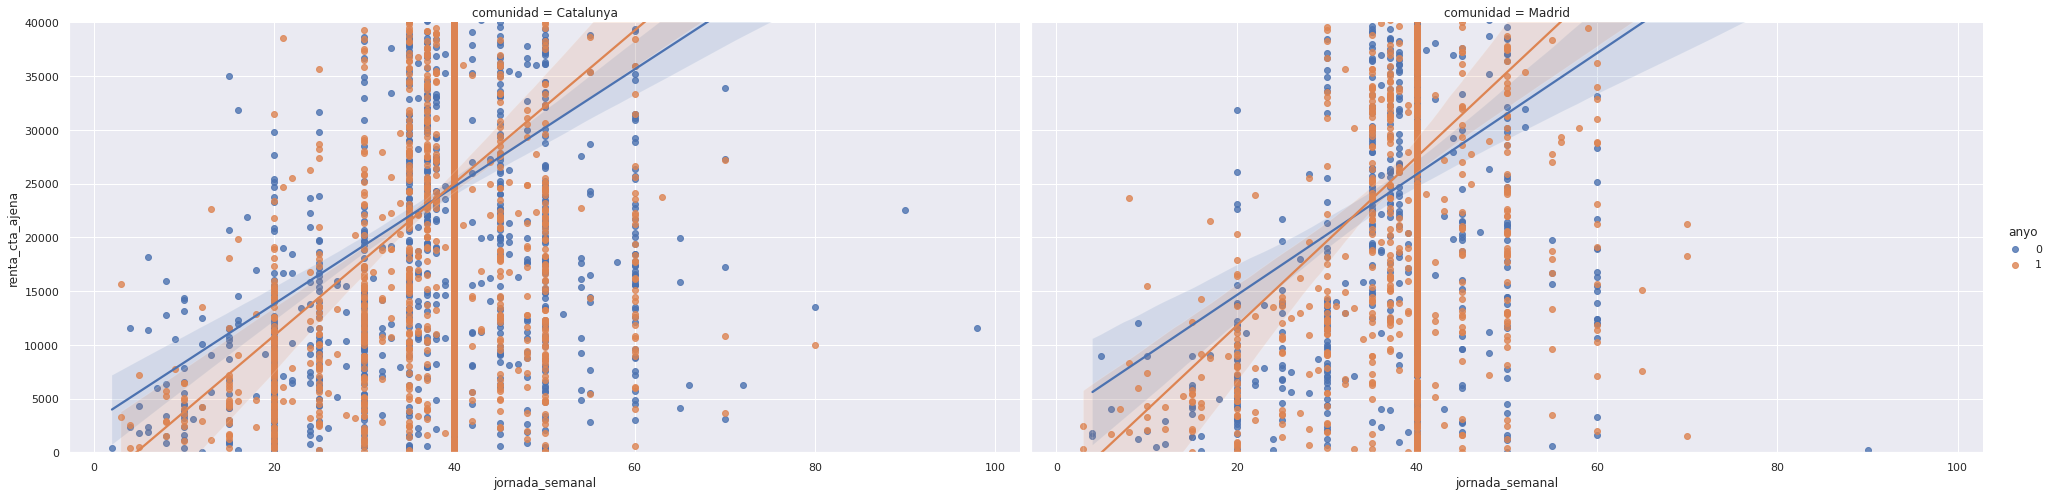

In [ ]:
a=sns.lmplot(x='jornada_semanal', y='renta_cta_ajena',col='comunidad', hue='anyo', data=datos[datos.renta_cta_ajena > 0], ci=95, aspect=2, height=7);
a.set(ylim=(0, 40000));

# Diferencias de ingresos de trabajadores por cuenta propia

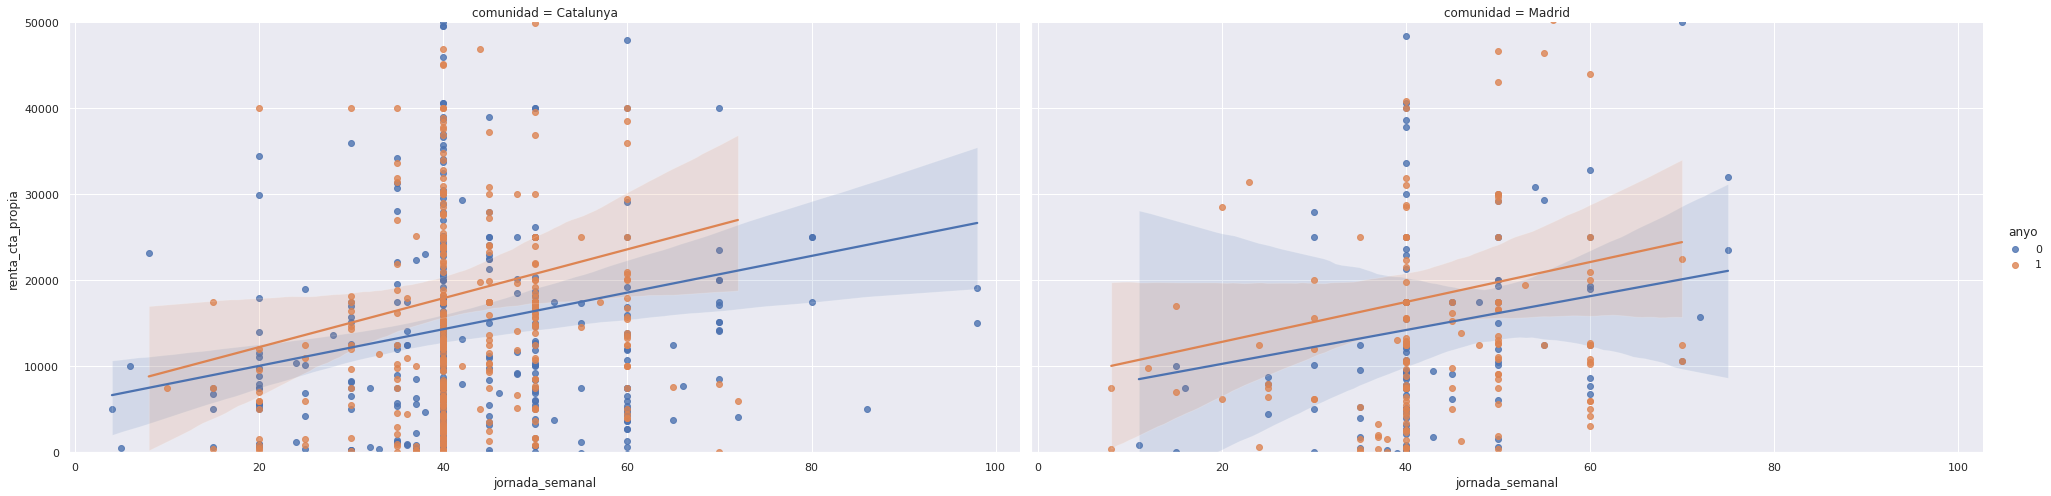

In [ ]:
a=sns.lmplot(x='jornada_semanal', y='renta_cta_propia',col='comunidad', hue='anyo', data=datos[datos.renta_cta_propia != 0], ci=95, aspect=2, height=7)
a.set(ylim=(0, 50000));

# Esqueleto con scikit-learn

In [1]:
#y=datos[datos.renta_cta_ajena>0].renta_cta_ajena
#X=datos.iloc[datos.renta_cta_ajena>0, ['jornada_semanal', 'anyo']]
#elevacion=datos[datos.renta_cta_ajena>0].ponderacion
#poly = PolynomialFeatures(interaction_only=True,include_bias = False)
#poly.fit_transform(X)
#clf = linear_model.LinearRegression()
#clf.fit(X, y, elevacion)